<a href="https://colab.research.google.com/github/JorgeAccardi/cienciadedatos/blob/main/TelecomX_LATAM_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

##✅ PASO 1: Importación de datos desde la API (GitHub)
🧩 ETAPA ETL: Extracción (Extract)

## 📥 Extracción de los datos desde la API (GitHub)
**Etapa ETL:** Extracción (Extract)

El objetivo de este paso es importar el archivo JSON que contiene los datos de clientes de Telecom X, simulando una extracción desde una API. El archivo se encuentra alojado en un repositorio público de GitHub, por lo tanto accederemos a él utilizando su URL directa (*raw URL*).

### 🔹 Variables y funciones utilizadas:

- `url`: contiene la dirección del archivo JSON en crudo desde GitHub.
- `pd.read_json()`: función de pandas que permite leer un archivo JSON directamente desde una URL o archivo local y lo convierte en un DataFrame.
- `df_crudo`: nombre del DataFrame donde se almacenan los datos crudos originales importados.
- `df_crudo.head()`: método que muestra las primeras 5 filas del DataFrame para verificar la estructura inicial.

### 📌 ¿Qué hace cada línea del código?

1. **Importación de pandas:** Se importa la biblioteca pandas, fundamental para la manipulación de datos.
2. **Definición de URL:** Se guarda en la variable `url` la dirección directa al archivo JSON.
3. **Carga del JSON:** Se lee el archivo y se convierte en un DataFrame con `pd.read_json(url)`.
4. **Vista previa de los datos:** Se usa `df_crudo.head()` para ver las primeras filas y validar que la carga fue exitosa.

Este paso marca el inicio del proceso ETL, específicamente la etapa de **extracción**.


In [6]:
import pandas as pd  # 1. Importamos la biblioteca pandas

# 2. URL del archivo JSON crudo desde GitHub
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# 3. Leemos el JSON y lo convertimos en un DataFrame
df_crudo = pd.read_json(url)

# 4. Mostramos las primeras filas para verificar
df_crudo.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##✅ PASO 2 – Aplanar el JSON (normalización de estructura anidada)
🧩 ETAPA ETL: Extracción (Extract)

## 📥 Aplanamiento del JSON con estructura anidada
**Etapa ETL:** Extracción (Extract)

Los datos cargados en el paso anterior tienen una estructura jerárquica o anidada. Es decir, algunas columnas contienen diccionarios dentro de sí mismas, como por ejemplo `customer`, `account`, `phone`, `internet`.

Para analizarlos correctamente, necesitamos "aplanar" esta estructura. Para eso usamos la función `json_normalize()` de pandas, que permite convertir objetos JSON anidados en un DataFrame plano con columnas accesibles.

### 🔹 Variables y funciones utilizadas:

- `df_crudo`: DataFrame original con la estructura anidada (creado en el paso anterior).
- `df_crudo.to_dict(orient='records')`: convierte el DataFrame en una lista de diccionarios, un formato que `json_normalize` puede interpretar.
- `pd.json_normalize()`: aísla todos los niveles anidados y los transforma en columnas planas.
- `sep='_'`: define que las claves anidadas se unirán con guion bajo (por ejemplo, `customer_gender`).

- `df`: será el nuevo DataFrame ya aplanado y listo para análisis.

### 📌 ¿Qué hace este paso?

1. Convierte el DataFrame original a una lista de diccionarios (uno por fila).
2. Aplica `json_normalize()` para desanidar las claves internas.
3. Une los nombres de las claves con `_` para facilitar futuras referencias.

Resultado: un DataFrame limpio y plano, con columnas como `customer_gender`, `account_Contract`, `internet_StreamingTV`, etc.


In [7]:
# Convertimos el DataFrame a una lista de diccionarios para normalizarlo
datos_dict = df_crudo.to_dict(orient='records')

# Aplicamos json_normalize para aplanar las columnas anidadas
df = pd.json_normalize(datos_dict, sep='_')

# Mostramos las primeras filas del DataFrame plano
df.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

##✅ PASO 3 – Exploración de columnas y tipos de datos
🧩 ETAPA ETL: Transformación (Transform)



## 🔍 Exploración de columnas y tipos de datos
**Etapa ETL:** Transformación (Transform)

Ahora que tenemos el DataFrame en formato plano, es fundamental entender su estructura general. Esto incluye:

- Ver cuántas columnas tenemos
- Conocer los tipos de datos en cada columna
- Detectar posibles columnas con errores de tipo (ej: numéricos como texto)

Esta información es clave para identificar qué variables serán útiles en el análisis de las bajas de los clientes (churn).

### 🔹 Variables y funciones utilizadas:

- `df.info()`: muestra una visión general del DataFrame: número de columnas, tipos de datos y valores no nulos por columna.
- `df.dtypes`: lista los tipos de datos (`int64`, `float64`, `object`, etc.) para cada columna.
- `df.columns.to_list()`: devuelve una lista con los nombres de todas las columnas.

### 📌 ¿Qué hace este paso?

1. **Evalúa estructura general:** número de columnas, filas, tipos de datos y valores no nulos.
2. **Ayuda a detectar errores comunes:** como fechas no formateadas o números mal interpretados.
3. **Prepara el terreno** para la limpieza y estandarización.

Este paso marca el inicio de la etapa **Transform** dentro del proceso ETL.


In [8]:
# 1. Información general del DataFrame
df.info()

# 2. Tipos de datos por columna
df.dtypes

# 3. Listado completo de columnas
df.columns.to_list()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

['customerID',
 'Churn',
 'customer_gender',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract',
 'account_PaperlessBilling',
 'account_PaymentMethod',
 'account_Charges_Monthly',
 'account_Charges_Total']

## ✅ PASO 4 – Consulta del diccionario de datos y selección de variables relevantes
🧩 ETAPA ETL: Transformación (Transform)

## 📖 Consulta del diccionario de datos y selección de variables relevantes
**Etapa ETL:** Transformación (Transform)

Para comprender mejor el significado de cada columna del dataset, se consulta el diccionario de datos provisto. Este documento describe el propósito y el contenido de cada variable, lo que permite:

- Interpretar correctamente los campos
- Identificar las variables más relevantes para explicar la baja de los clientes (churn)

### 🔹 Variables y funciones utilizadas:

- `open()`: función estándar de Python para abrir archivos.
- `read()`: método para leer el contenido del archivo.
- `print()`: muestra el contenido del diccionario en pantalla.

### 📌 ¿Qué hace este paso?

1. Lee y muestra el archivo `TelecomX_diccionario.md`.
2. Permite interpretar adecuadamente cada columna.
3. Sirve como base para seleccionar las variables clave en el análisis.

Se presta especial atención a variables relacionadas con el contrato, método de pago, antigüedad, servicios contratados y monto facturado, ya que son las más relacionadas con las bajas.

Este paso es clave en la fase de **Transformación**, porque define con qué variables continuaremos trabajando.


In [9]:
# Mostrar el contenido del diccionario de datos
with open('/content/TelecomX_diccionario.md', 'r', encoding='utf-8') as file:
    print(file.read())


#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

## 🧠 Selección de variables clave para el análisis de evasión (Churn)
**Etapa ETL:** Transformación (Transform)

A partir del diccionario de datos, se seleccionaron las siguientes variables como potencialmente relevantes para explicar las bajas de clientes (`churn`). Estas variables fueron elegidas en base a su relación directa con el comportamiento del cliente y su nivel de compromiso con la empresa.

| Variable (columna)     | Significado                              | ¿Por qué es relevante?                                      |
|------------------------|------------------------------------------|-------------------------------------------------------------|
| `churn`                | Si el cliente se dio de baja (`yes/no`)  | Es la variable objetivo del análisis.                       |
| `tenure`               | Meses como cliente                       | Clientes nuevos tienen mayor probabilidad de cancelar.      |
| `contract`             | Tipo de contrato (mensual, anual, etc.)  | Contratos más largos tienden a fidelizar más.               |
| `paymentmethod`        | Método de pago                           | Algunos métodos (ej. electronic check) se asocian a más bajas. |
| `paperlessbilling`     | Uso de facturación electrónica           | Indica nivel de digitalización y comportamiento.            |
| `monthly`              | Monto facturado mensualmente             | Cargos más altos pueden generar deserción.                  |
| `total`                | Total facturado históricamente           | Ayuda a distinguir clientes nuevos de clientes leales.      |
| `partner`              | Si tiene pareja                          | Puede indicar mayor estabilidad o dependencia del servicio. |
| `dependents`           | Si tiene personas a cargo                | Similar a `partner`, sugiere mayor necesidad de continuidad.|
| `internetservice`      | Tipo de conexión a internet              | Determina el valor percibido del servicio.                  |
| `streamingtv`, `streamingmovies` | Servicios adicionales contratados | Clientes con más servicios son menos propensos a irse.     |
| `phoneservice`, `techsupport`, `onlinesecurity`, `onlinebackup` | Servicios complementarios | Permiten analizar la vinculación del cliente con la empresa.|

Esta selección de variables guiará el resto del análisis y será la base para visualizaciones, agrupamientos y, en etapas futuras, modelado predictivo.


##✅ PASO 5 – Verificación de incoherencias en los datos
🧩 ETAPA ETL: Transformación (Transform)

## 🧪 Verificación de incoherencias en los datos
**Etapa ETL:** Transformación (Transform)

Antes de continuar con el análisis, es fundamental revisar si el dataset presenta problemas de calidad que puedan afectar los resultados. En este paso se identifican posibles incoherencias como:

- Valores nulos
- Filas duplicadas
- Columnas con tipos de datos incorrectos
- Inconsistencias en las categorías (por ejemplo: "Yes", " yes", "yes ")

### 🔹 Variables y funciones utilizadas:

- `df.isnull().sum()`: muestra cuántos valores faltantes hay por columna.
- `df.duplicated().sum()`: cuenta cuántas filas duplicadas existen.
- `df.select_dtypes(include='object')`: selecciona solo las columnas categóricas (tipo texto).
- `Series.unique()`: muestra los valores únicos por columna para detectar inconsistencias en mayúsculas/minúsculas o espacios.
- `str.strip()` / `str.lower()`: funciones para limpiar y estandarizar texto.

### 📌 ¿Qué hace este paso?

1. Identifica valores faltantes para decidir si se imputan o eliminan.
2. Detecta duplicados que puedan distorsionar los análisis.
3. Revisa si hay errores de formato o tipeado.
4. Inspecciona valores categóricos que puedan estar mal escritos o duplicados visualmente.

Este paso es esencial para garantizar la calidad y coherencia de los datos antes de su transformación final.


In [10]:
# 1. Verificar valores nulos por columna
print("🔍 Valores nulos por columna:")
print(df.isnull().sum())

# 2. Verificar si hay filas duplicadas
print("\n🔁 Filas duplicadas:", df.duplicated().sum())

# 3. Verificar inconsistencias en valores categóricos (columnas tipo texto)
print("\n🔠 Valores únicos por columna categórica:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}: {df[col].unique()}")


🔍 Valores nulos por columna:
customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64

🔁 Filas duplicadas: 0

🔠 Valores únicos por columna categórica:

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn: ['No' 'Yes' '']

customer_gender: ['Female' 'Male']

customer_Partner: ['Yes' 'No']

customer_Dependents: ['Yes' 'No']

phone_PhoneServi

##✅ PASO 6 – Manejo de inconsistencias y limpieza de datos
🧩 ETAPA ETL: Transformación (Transform)

## 🧹 Limpieza y estandarización de datos (completo)
**Etapa ETL:** Transformación (Transform)

En este paso se realiza una limpieza estructural y semántica del dataset para garantizar su coherencia antes del análisis. Es una etapa crítica para asegurar que las variables estén en el formato correcto y listas para ser utilizadas.

---

### 🎯 Objetivos del paso:

- Eliminar prefijos innecesarios en los nombres de columnas.
- Normalizar los nombres de columnas (minúsculas, sin espacios).
- Estabilizar los valores de texto (formato homogéneo).
- Convertir variables categóricas binarias (`yes` / `no`) a `1` y `0`.
- Convertir columnas numéricas mal tipadas (ej. `monthly`, `total`).
- Eliminar registros incompletos (con valores nulos).
- Reiniciar el índice del DataFrame.

---

### 🔹 Variables y funciones utilizadas:

| Función / Variable            | Descripción                                                             |
|------------------------------|-------------------------------------------------------------------------|
| `df.columns.str.replace()`   | Elimina prefijos en nombres de columnas                                 |
| `df.columns.str.lower()`     | Convierte nombres de columnas a minúsculas                              |
| `.str.strip().str.lower()`   | Limpia espacios y homogeneiza valores de texto                          |
| `.map({'yes': 1, 'no': 0})`  | Transforma variables categóricas binarias a numéricas                   |
| `pd.to_numeric()`            | Convierte cadenas a números, con manejo de errores                      |
| `df.dropna()`                | Elimina filas con valores faltantes                                     |
| `df.reset_index()`           | Reinicia el índice del DataFrame para mantener orden                   |

---

### 📌 Resultado final del paso:

- Todas las columnas están renombradas, limpias y normalizadas.
- Las variables categóricas clave (`churn`, `partner`, `phoneservice`, etc.) están convertidas en binarias.
- Las columnas numéricas `monthly` y `total` están listas para análisis.
- No quedan valores nulos ni errores de formato en el dataset.

Este paso marca la finalización de la fase **Transformación (Transform)** del proceso ETL.


In [11]:
# 1. Eliminar prefijos innecesarios
df.columns = df.columns.str.replace('customer_', '', regex=False)
df.columns = df.columns.str.replace('account_', '', regex=False)
df.columns = df.columns.str.replace('charges_', '', regex=False)
df.columns = df.columns.str.replace('phone_', '', regex=False)
df.columns = df.columns.str.replace('internet_', '', regex=False)

# 2. Convertir nombres de columnas a minúsculas
df.columns = df.columns.str.lower()

# 3. Limpiar y normalizar valores de texto (minúsculas + sin espacios)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

# 4. Convertir columnas yes/no a binarias 1/0
cols_binarias = ['partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn']
for col in cols_binarias:
    if col in df.columns:
        df[col + '_bin'] = df[col].map({'yes': 1, 'no': 0})

# 5. Convertir columnas numéricas (pueden estar como string)
df['monthly'] = pd.to_numeric(df['monthly'], errors='coerce')
df['total'] = pd.to_numeric(df['total'], errors='coerce')

# 6. Eliminar valores nulos remanentes
df = df.dropna()

# 7. Reiniciar el índice
df.reset_index(drop=True, inplace=True)

# 8. Confirmar estructura final
print(f"✅ Dataset limpio con {df.shape[0]} filas y {df.shape[1]} columnas.")
df.head()


KeyError: 'monthly'

##✅ PASO 7 – Creación de la columna dailycharges (cuentas diarias)
🧩 ETAPA ETL: Transformación (Transform)**texto en negrita**

## ➗ Creación de la columna `cuentas_diarias`
**Etapa ETL:** Transformación (Transform)

En este paso creamos una nueva variable derivada: `cuentas_diarias`, que representa el gasto diario promedio estimado para cada cliente, calculado a partir del cargo mensual.

Esta nueva columna permitirá analizar el comportamiento financiero del cliente con mayor detalle y servirá de insumo en análisis posteriores, tanto exploratorios como predictivos.

---

### 🔹 Variables y funciones utilizadas:

| Elemento                    | Descripción                                                                |
|-----------------------------|----------------------------------------------------------------------------|
| `df['monthly']`             | Monto mensual del cliente                                                  |
| `df['cuentas_diarias']`     | Nueva columna con el gasto diario estimado                                 |
| `monthly / 30`              | Supone meses de 30 días como aproximación estándar                         |
| `.round(2)`                 | Redondea los valores a 2 decimales para facilitar su interpretación         |

---

### 📌 Resultado esperado

Se genera una columna adicional `cuentas_diarias` en el DataFrame. Esta variable puede mostrar diferencias entre clientes con mayor o menor propensión al churn, y ayuda a analizar el costo percibido del servicio.


In [ ]:
# Crear columna "cuentas_diarias" como estimación del costo por día
df['cuentas_diarias'] = (df['monthly'] / 30).round(2)

# Verificar creación y consistencia con la columna original
df[['monthly', 'cuentas_diarias']].head()


#📊 Carga y análisis

#🚀 Fase ETL: Load & Analysis – Análisis Exploratorio de Datos (EDA)

##✅ PASO 8 – Estadísticas descriptivas generales
🧩 ETAPA ETL: Carga y Análisis (Load & Analysis)

## 📊 Paso 8 – Estadísticas descriptivas del dataset
**Etapa ETL:** Carga y Análisis (Load & Analysis)

El primer paso del análisis consiste en obtener una visión general de las variables numéricas del dataset, a través de estadísticas descriptivas como:

- Media (promedio)
- Mediana
- Desviación estándar
- Mínimos y máximos
- Cuartiles

Este análisis permite identificar valores extremos, sesgos y rangos característicos de cada variable numérica.

---

### 🔹 Variables y funciones utilizadas:

| Función / método         | Descripción                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| `df.describe()`          | Calcula automáticamente estadísticas básicas para todas las columnas numéricas |
| `include='all'` (opcional) | También puede incluir variables categóricas para ver conteos y valores únicos |

---

### 📌 Objetivo del paso

- Detectar posibles valores atípicos o mal ingresados
- Comprender la distribución de variables como `tenure`, `monthly`, `total`, `cuentas_diarias`
- Preparar el terreno para visualizar comparaciones entre clientes que abandonaron y los que no


In [ ]:
# Mostrar estadísticas descriptivas básicas del dataset
df.describe()

#✅ PASO 9 – Distribución general de evasión (churn)
🧩 ETAPA ETL: Carga y Análisis (Load & Analysis)

## 📉 Paso 9 – Distribución general de evasión (churn)
**Etapa ETL:** Carga y Análisis (Load & Analysis)

En este paso se analiza la variable objetivo `churn_bin`, que indica si un cliente abandonó (`1`) o no (`0`) la empresa. El objetivo es visualizar cuántos clientes se dieron de baja y cuántos permanecieron activos.

---

### 🎯 Objetivo:

- Identificar el grado de desbalance entre clientes que abandonaron y los que permanecen.
- Visualizar esta proporción con un gráfico de barras.
- Calcular el porcentaje de evasión (churn rate) para tener una métrica clara del problema.

---

### 🔹 Variables y funciones utilizadas:

| Elemento                     | Descripción                                                         |
|------------------------------|---------------------------------------------------------------------|
| `df['churn_bin'].value_counts()` | Cuenta cuántos clientes hay en cada grupo (0 y 1)              |
| `normalize=True`             | Muestra la proporción en lugar del conteo bruto                     |
| `Seaborn (sns.countplot)`    | Crea un gráfico de barras para visualizar la distribución           |
| `Matplotlib (plt.title, xlabel, ylabel)` | Añade detalles al gráfico como etiquetas y título      |

---

### 📌 Resultado esperado:

Un gráfico de barras que muestre cuántos clientes permanecieron (`churn_bin = 0`) y cuántos se dieron de baja (`churn_bin = 1`), acompañado del porcentaje de evasión general.


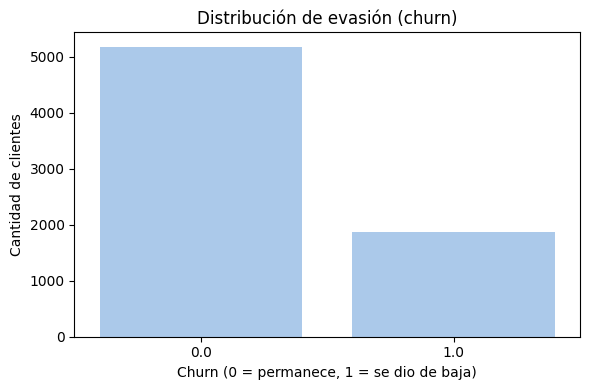

📈 Tasa de evasión (%):
churn_bin
0.0    73.46
1.0    26.54
Name: proportion, dtype: float64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo general
plt.figure(figsize=(6,4))
sns.set_palette("pastel")

# Gráfico de barras de distribución de churn
sns.countplot(data=df, x='churn_bin')
plt.title('Distribución de evasión (churn)')
plt.xlabel('Churn (0 = permanece, 1 = se dio de baja)')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()

# Porcentajes
churn_rate = df['churn_bin'].value_counts(normalize=True) * 100
print("📈 Tasa de evasión (%):")
print(churn_rate.round(2))


#📄Informe final